In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [28]:
data = pd.read_csv('ETH2019-2024.csv')
close_prices = data['Close']

In [29]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 8:2
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

In [30]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()

In [31]:
# Dự báo cho tập test
forecast_test = model.predict(start=test.index[0], end=test.index[-1])

In [32]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, forecast_test))
mape_test = mean_absolute_percentage_error(test, forecast_test)
mse_test = mean_squared_error(test, forecast_test)

In [33]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 654.4206184379282
MAPE: 27.91833343067589
MSE: 428266.34583668044


### Dự báo

#### Dự báo 30 ngày

In [34]:
# Dự báo cho 30 ngày tiếp theo
forecast_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(forecast_30_days)

1816    1684.266845
1817    1646.243048
1818    1635.069226
1819    1598.707751
1820    1485.760204
1821    1473.615877
1822    1444.946182
1823    1412.374586
1824    1338.871113
1825    1399.730438
1826    1449.376194
1827    1431.393557
1828    1432.440000
1829    1392.234167
1830    1424.143555
1831    1447.697006
1832    1460.124659
1833    1506.834785
1834    1552.565841
1835    1499.699294
1836    1490.523091
1837    1452.982611
1838    1473.747323
1839    1456.073523
1840    1430.695945
1841    1444.913308
1842    1438.945491
1843    1443.175876
1844    1441.369234
1845    1401.198228
dtype: float64


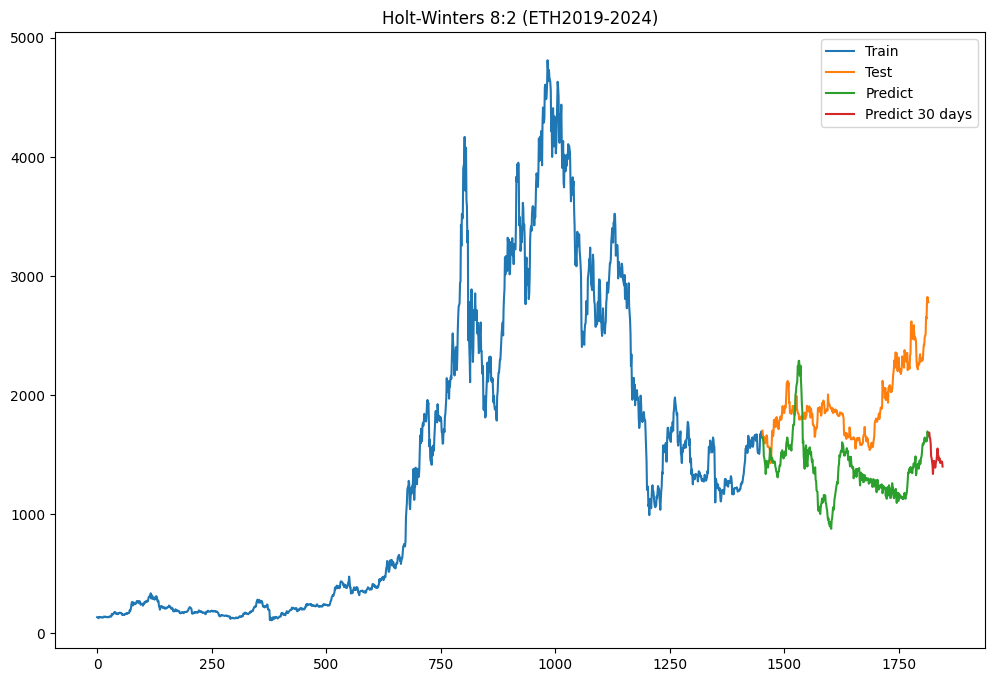

In [35]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_30_days.index, forecast_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [36]:
# Dự báo cho 60 ngày tiếp theo
forecast_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(forecast_60_days)

1816    1684.266845
1817    1646.243048
1818    1635.069226
1819    1598.707751
1820    1485.760204
1821    1473.615877
1822    1444.946182
1823    1412.374586
1824    1338.871113
1825    1399.730438
1826    1449.376194
1827    1431.393557
1828    1432.440000
1829    1392.234167
1830    1424.143555
1831    1447.697006
1832    1460.124659
1833    1506.834785
1834    1552.565841
1835    1499.699294
1836    1490.523091
1837    1452.982611
1838    1473.747323
1839    1456.073523
1840    1430.695945
1841    1444.913308
1842    1438.945491
1843    1443.175876
1844    1441.369234
1845    1401.198228
1846    1388.203346
1847    1360.275202
1848    1352.752997
1849    1329.232737
1850    1310.208289
1851    1334.078838
1852    1362.050726
1853    1361.229418
1854    1406.503591
1855    1410.923471
1856    1409.807152
1857    1475.547105
1858    1520.525101
1859    1513.234664
1860    1538.047389
1861    1519.085222
1862    1480.824081
1863    1468.684576
1864    1499.576309
1865    1520.962249


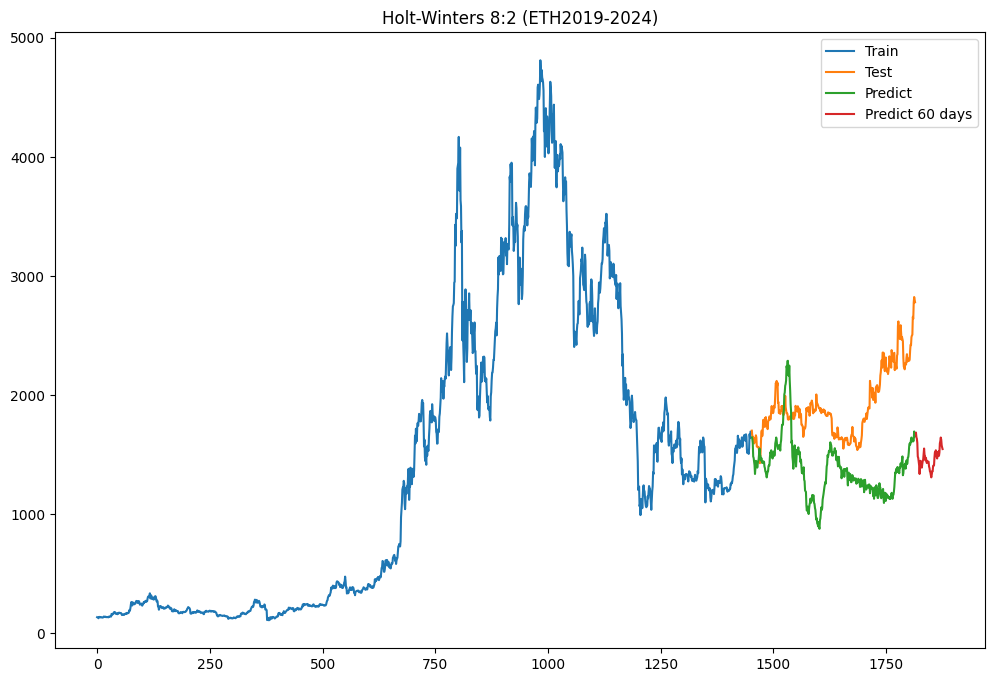

In [37]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_60_days.index, forecast_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [38]:
# Dự báo cho 60 ngày tiếp theo
forecast_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(forecast_90_days)

1816    1684.266845
1817    1646.243048
1818    1635.069226
1819    1598.707751
1820    1485.760204
           ...     
1901    2124.643319
1902    2039.271748
1903    1924.365855
1904    1863.909581
1905    1598.283880
Length: 90, dtype: float64


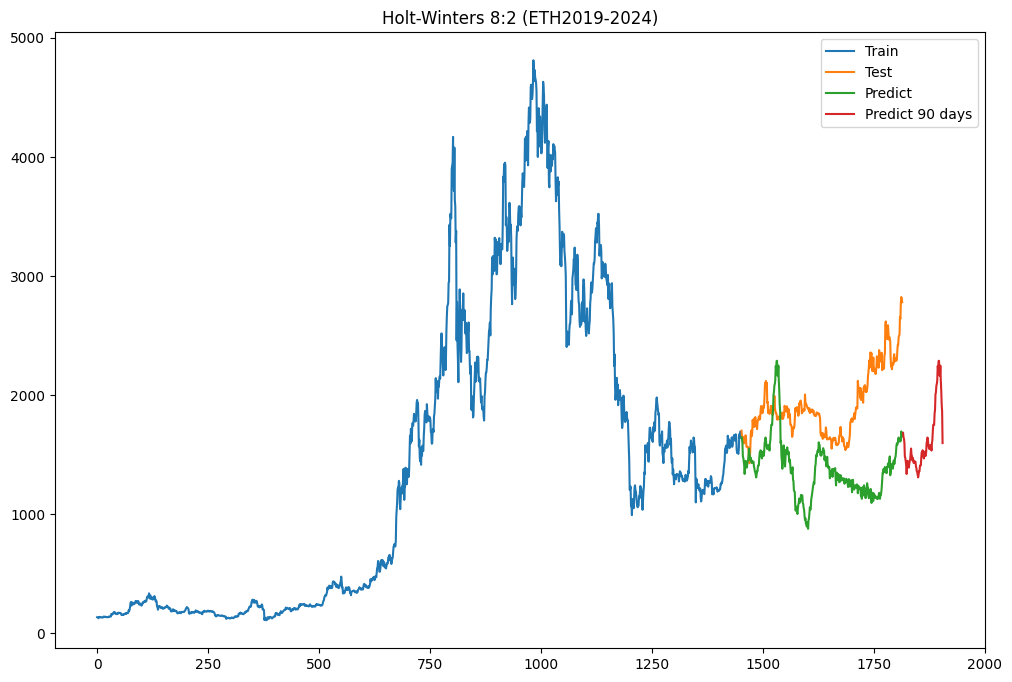

In [39]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 8:2 (ETH2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='Predict')
plt.plot(forecast_90_days.index, forecast_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()